In [1]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
import scipy.io as sio
file_path="D:/missdd/ML_Project/Traffic_Flow_Prediction_LSTM/results"
file_results="results"
results=sio.loadmat(os.path.join(file_path, file_results))

In [5]:
y_target = results['y_target']
print(y_target.shape)
y_predict = results['y_predict']
print(y_predict.shape)
mape = results['mape']
print(mape.shape)
mae = results['mae']
print(mae.shape)
rmse = results['rmse']
print(rmse.shape)

(2880, 69)
(2880, 69)
(1, 2000)
(1, 2000)
(1, 2000)


In [3]:
def plot_day(Y_test,Y_predict):
    x1 = time.strptime('2016-01-01 00:00:00','%Y-%m-%d %X')
    x2 = time.strptime('2016-01-02 00:00:00','%Y-%m-%d %X')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(Y_predict)
    ntick = 24
    delta = (x4 - x3) / ntick
    
    x0 = x3
    xt = [time.strftime('%H:%M',x1)]
    for i in range(ntick-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%H:%M',x00)
        xt.append(x00)
    xt.append('24:00')
              
    x = np.arange(n)
    fig,ax = plt.subplots()
    plt.plot(x,Y_test,'-k.',x,Y_predict,'-m.')
    plt.xticks(x, xt, rotation = 90)
    plt.xlabel('Time')
    plt.ylabel('Flow  ( Veh / 5 mins )')
    plt.legend(labels = ['Observed traffic flow', 'Predicted traffic flow'], loc = 'lower center')
    
    aticks = np.arange(0,n,12)
    aticks = np.append(aticks, n)    
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)

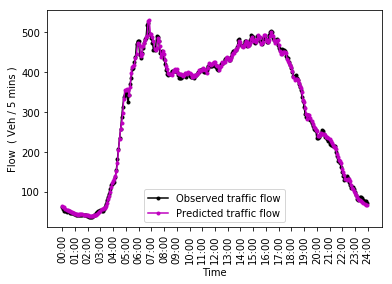

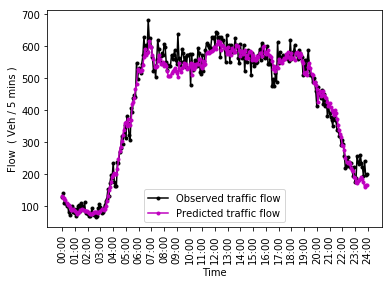

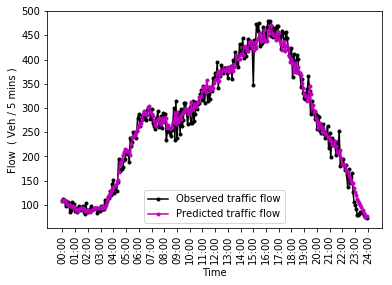

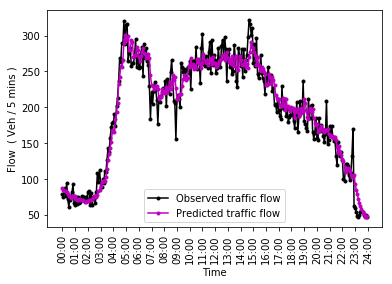

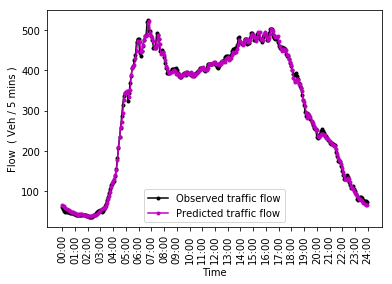

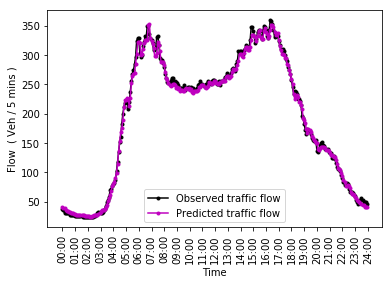

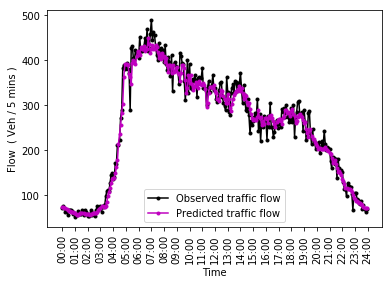

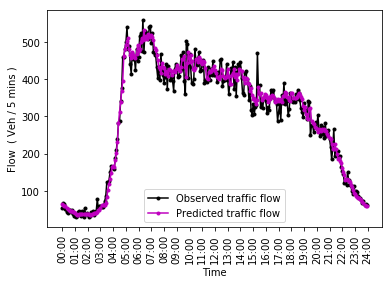

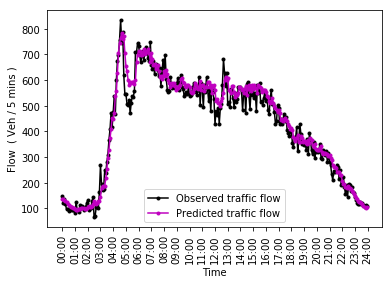

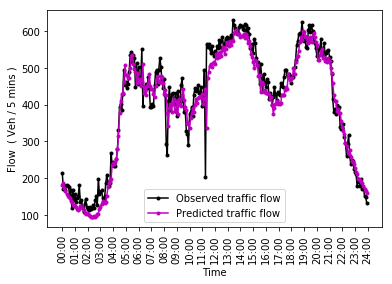

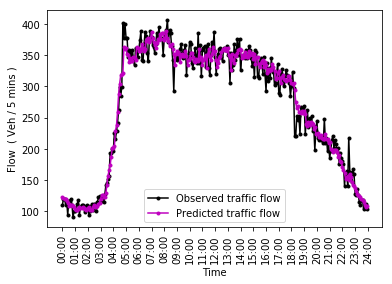

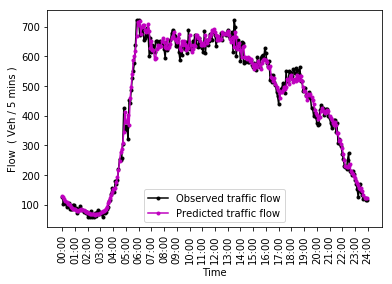

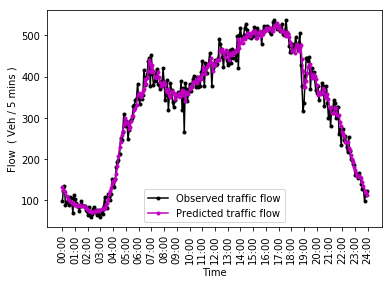

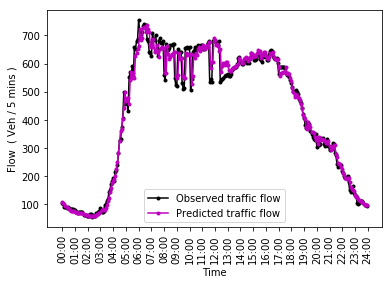

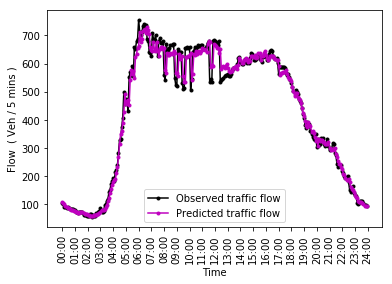

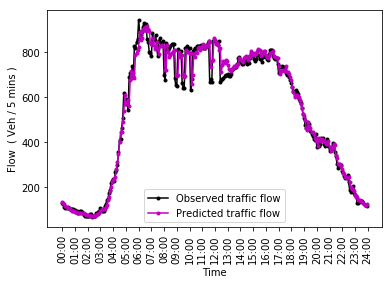

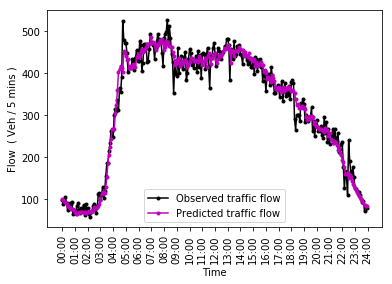

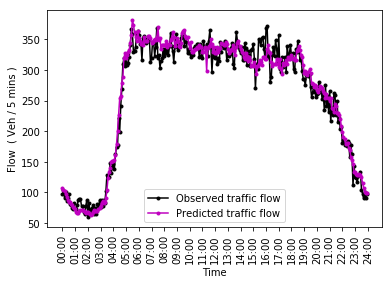

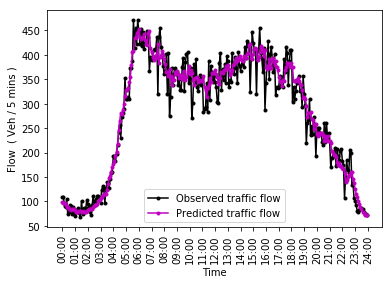

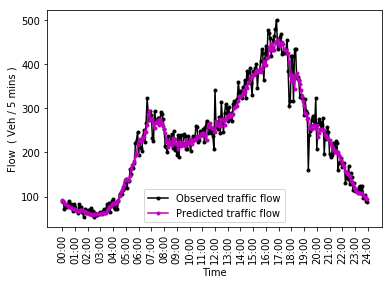

In [8]:
station_ind = [17, 34, 18, 7, 6, 28, 29, 41, 66, 58, 53, 46, 63, 57, 56, 52, 54, 31, 16, 60]
for i in station_ind:
    plot_day(y_target[:288, i]*1188,y_predict[:288, i]*1188)

In [9]:
def plot_week(Y_test,Y_predict):
    x1 = time.strptime('2016-04-04','%Y-%m-%d')
    x2 = time.strptime('2016-04-09','%Y-%m-%d')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(Y_predict)
    nday = 5
    delta = (x4 - x3) / nday
    
    x0 = x3
    xt = [time.strftime('%m:%d',x1)]
    for i in range(nday-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%m-%d',x00)
        xt.append(x00)
    xt.append('04-09')
              
    x = np.arange(n)
    fig,ax = plt.subplots()
    plt.plot(x,Y_test,'-k.',x,Y_predict,'-m.')
    plt.xticks(x, xt)
    plt.xlabel('Date')
    plt.ylabel('Flow  ( Veh / 5 mins )')
    plt.legend(labels = ['Observed traffic flow', 'Predicted traffic flow'], loc = 'center right')
    
    aticks = np.arange(0,n,12*24)
    aticks = np.append(aticks, n)
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)

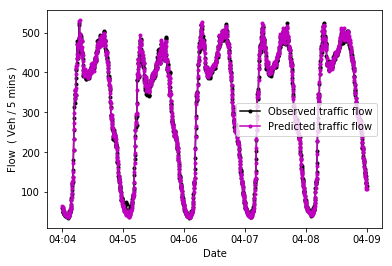

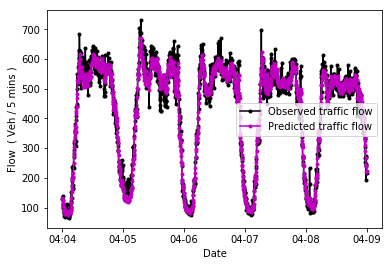

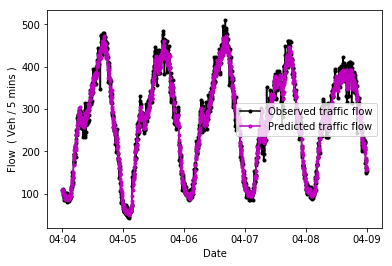

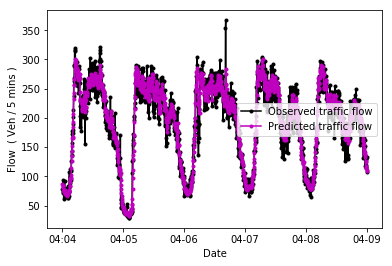

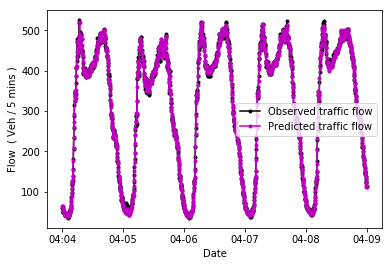

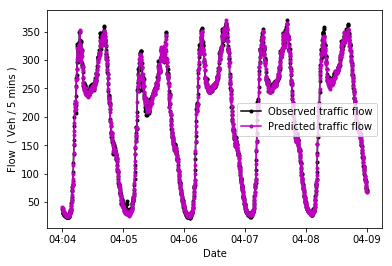

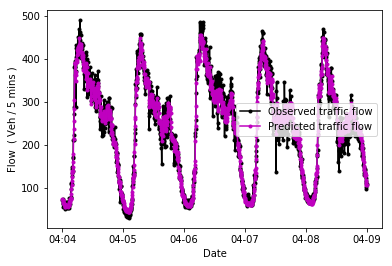

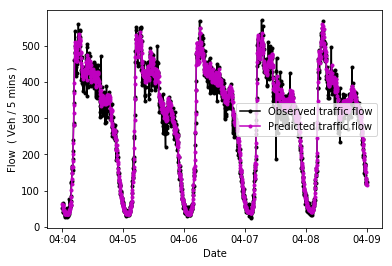

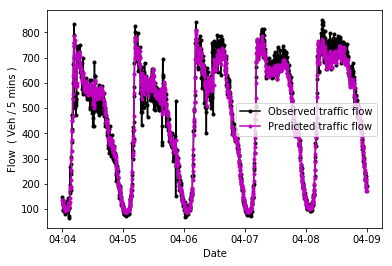

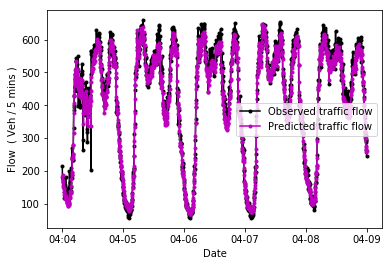

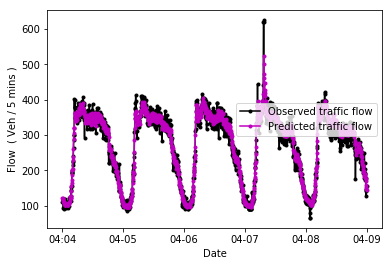

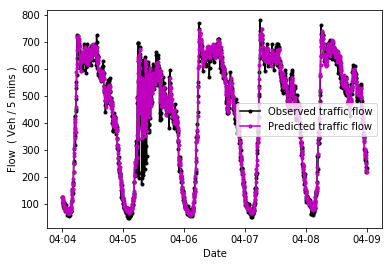

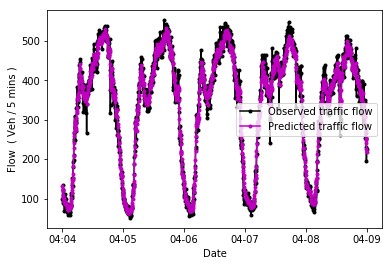

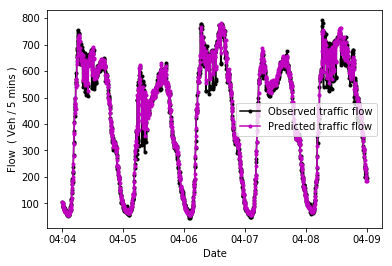

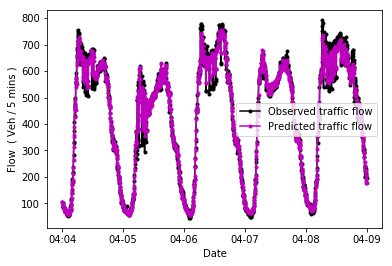

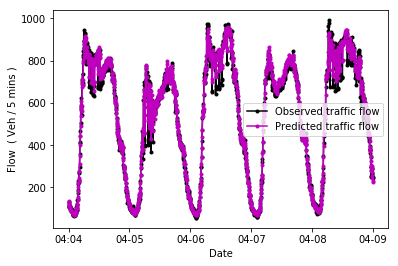

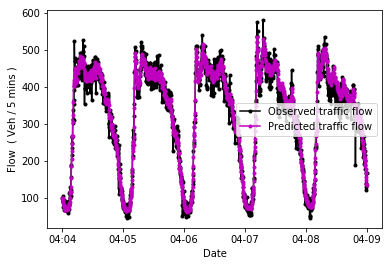

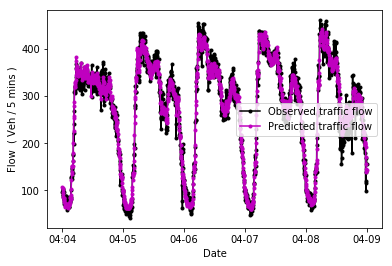

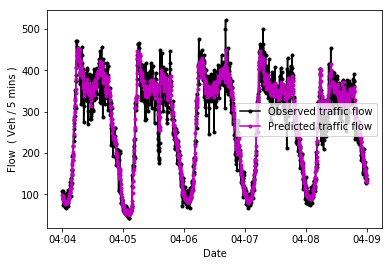

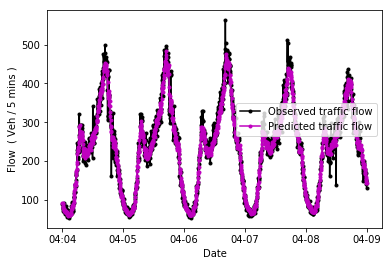

In [10]:
station_ind = [17, 34, 18, 7, 6, 28, 29, 41, 66, 58, 53, 46, 63, 57, 56, 52, 54, 31, 16, 60]
for i in station_ind:
    plot_week(y_target[:1440, i]*1188,y_predict[:1440, i]*1188)